In [2]:
from simulation import *
from aesthetics import *

import glob
import os as os
import re as re
import pandas as pd

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)
cmap = sns.color_palette("Paired", 10)

In [3]:
from plot import *
prepare_plot()

# Load in pre-computed pandas `DataFrame`s

These pickle files contain flux, stall force, and maximum power for each torsion angle as a fuction of substrate concentration. The concentration is stored as an exponent (i.e., -6.0 means the substrate concentration is $10^{-6.0}$ M).

In [4]:
adk_312 = pd.read_pickle('adk-concentration-scan.pickle')
pka_140 = pd.read_pickle('pka-concentration-scan.pickle')
hiv_10 = pd.read_pickle('hiv-concentration-scan-catalytic-rate-10.pickle')
hiv_200 = pd.read_pickle('hiv-concentration-scan-catalytic-rate-200.pickle')

In [5]:
adk_312.head(5)

,Concentration,Directional flux,Driven flux,File,Intersurface flux,Max load,Max power,ResID
0,-6.0,-0.000533,0.037806,chi1ALA11,0.010940,0.0,0.0,11
1,-6.0,-0.000021,0.011227,chi1ALA127,0.005050,0.0,0.0,127
2,-6.0,-0.000119,0.025289,chi1ALA17,0.009720,0.0,0.0,17
3,-6.0,0.000078,0.016022,chi1ALA176,0.005808,0.0,0.0,176
4,-6.0,0.000033,0.006140,chi1ALA186,0.002077,0.0,0.0,186


# Find the number of torsion angles above *directional* flux thresholds of 1 cycle per second and 10 cycle per second

In [8]:
concentrations, hiv_10_directional_flux_above_1 = find_above_threshold(hiv_10, 'Directional flux', 1)
concentrations, hiv_10_directional_flux_above_10 = find_above_threshold(hiv_10, 'Directional flux', 10)

concentrations, hiv_200_directional_flux_above_1 = find_above_threshold(hiv_200, 'Directional flux', 1)
concentrations, hiv_200_directional_flux_above_10 = find_above_threshold(hiv_200, 'Directional flux', 10)

concentrations, adk_312_directional_flux_above_1 = find_above_threshold(adk_312, 'Directional flux', 1)
concentrations, adk_312_directional_flux_above_10 = find_above_threshold(adk_312, 'Directional flux', 10)

concentrations, pka_140_directional_flux_above_1 = find_above_threshold(pka_140, 'Directional flux', 1)
concentrations, pka_140_directional_flux_above_10 = find_above_threshold(pka_140, 'Directional flux', 10)


100%|██████████| 60/60 [00:00<00:00, 150.03it/s]


# (a)

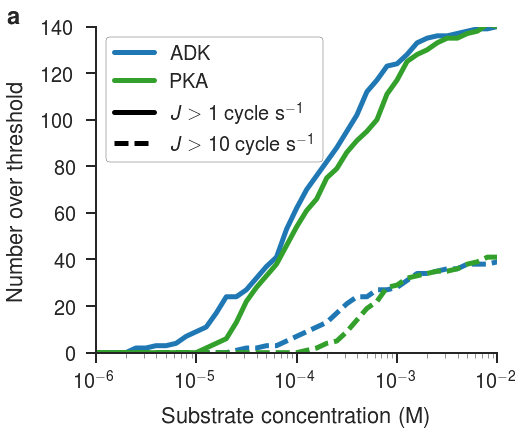

In [7]:
plot_flux_over_threshold(concentrations, [adk_312_directional_flux_above_1,
                                         adk_312_directional_flux_above_10,
                                         pka_140_directional_flux_above_1,
                                         pka_140_directional_flux_above_10], 
                         colors=[cmap[1], cmap[3]],
                         names=[r'ADK', r'PKA'],
                         threshold_labels=[r'$J > 1$ cycle s$^{{-1}}$', r'$J > 10$ cycle s$^{{-1}}$'],
                        ymax=140)
panel_label('a', panel_xoffset=-0.22, panel_yoffset=1.01)

# (b)

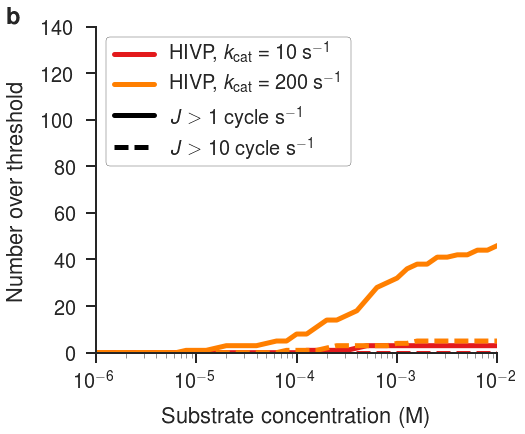

In [16]:
plot_flux_over_threshold(concentrations, [hiv_10_directional_flux_above_1,
                                         hiv_10_directional_flux_above_10,
                                         hiv_200_directional_flux_above_1,
                                         hiv_200_directional_flux_above_10], 
                         colors=[cmap[5], cmap[7]],
                         names=[r'HIVP, $k_\text{{cat}} = 10$ s$^{{-1}}$', r'HIVP, $k_\text{{cat}} = 200$ s$^{{-1}}$'],
                         threshold_labels=[r'$J > 1$ cycle s$^{{-1}}$', r'$J > 10$ cycle s$^{{-1}}$'],
                        ymax=140)
panel_label('b', panel_xoffset=-0.22, panel_yoffset=1.01)

# Find the number of torsion angles above *reciprocating* flux thresholds of 1 cycle per second and 10 cycle per second

In [6]:
concentrations, hiv_10_reciprocating_flux_above_1 = find_above_threshold(hiv_10, 'Driven flux', 1)
concentrations, hiv_10_reciprocating_flux_above_10 = find_above_threshold(hiv_10, 'Driven flux', 10)

concentrations, hiv_200_reciprocating_flux_above_1 = find_above_threshold(hiv_200, 'Driven flux', 1)
concentrations, hiv_200_reciprocating_flux_above_10 = find_above_threshold(hiv_200, 'Driven flux', 10)

concentrations, adk_312_reciprocating_flux_above_1 = find_above_threshold(adk_312, 'Driven flux', 1)
concentrations, adk_312_reciprocating_flux_above_10 = find_above_threshold(adk_312, 'Driven flux', 10)

concentrations, pka_140_reciprocating_flux_above_1 = find_above_threshold(pka_140, 'Driven flux', 1)
concentrations, pka_140_reciprocating_flux_above_10 = find_above_threshold(pka_140, 'Driven flux', 10)

100%|██████████| 60/60 [00:00<00:00, 240.79it/s]


But we may also want to subtract the number of angles showing significant directional flux, to highlight the number of angles showing predominantly reciprocating flux.

# (e)

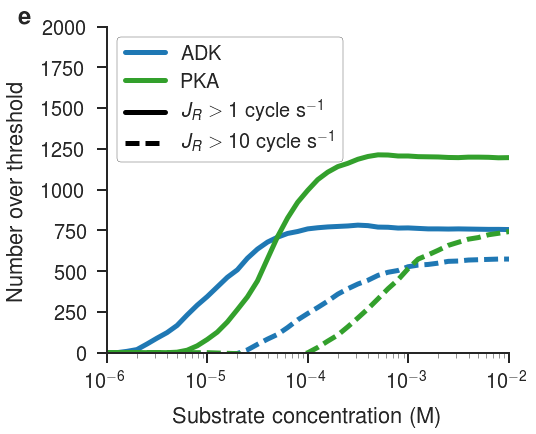

In [10]:
plot_flux_over_threshold(concentrations, [[i - j for i, j in zip(adk_312_reciprocating_flux_above_1, adk_312_directional_flux_above_1)],
                                         [i - j for i, j in zip(adk_312_reciprocating_flux_above_10, adk_312_directional_flux_above_1)],
                                         [i - j for i, j in zip(pka_140_reciprocating_flux_above_1, pka_140_directional_flux_above_1)],
                                         [i - j for i, j in zip(pka_140_reciprocating_flux_above_10, pka_140_directional_flux_above_1)]], 
                         colors=[cmap[1], cmap[3]],
                         names=[r'ADK', r'PKA'],
                         threshold_labels=[r'$J_R > 1$ cycle s$^{{-1}}$', r'$J_R > 10$ cycle s$^{{-1}}$'],
                        ymax=2000)
panel_label('e', panel_xoffset=-0.22, panel_yoffset=1.01)

# (f)

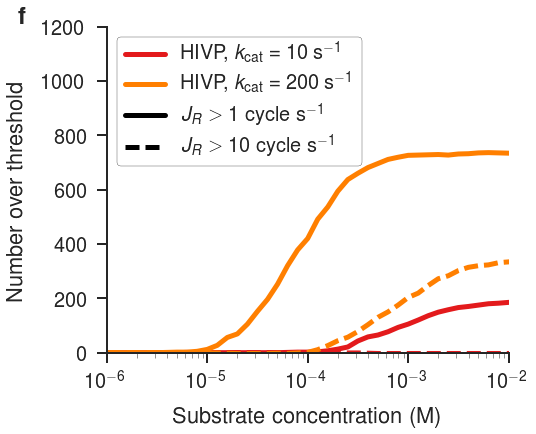

In [11]:
plot_flux_over_threshold(concentrations, [[i - j for i, j in zip(hiv_10_reciprocating_flux_above_1, hiv_10_directional_flux_above_1)],
                                         [i - j for i, j in zip(hiv_10_reciprocating_flux_above_10, hiv_10_directional_flux_above_1)],
                                         [i - j for i, j in zip(hiv_200_reciprocating_flux_above_1, hiv_200_directional_flux_above_1)],
                                         [i - j for i, j in zip(hiv_200_reciprocating_flux_above_10, hiv_200_directional_flux_above_1)]], 

                         colors=[cmap[5], cmap[7]],
                         names=[r'HIVP, $k_\text{{cat}} = 10$ s$^{{-1}}$', r'HIVP, $k_\text{{cat}} = 200$ s$^{{-1}}$'],
                         threshold_labels=[r'$J_R > 1$ cycle s$^{{-1}}$', r'$J_R > 10$ cycle s$^{{-1}}$'],
                        ymax=1200)
panel_label('f', panel_xoffset=-0.22, panel_yoffset=1.01)

# Find the number of torsion angles above the stall torque threshold of 0.1 kcal per mol per cycle.

The maximum load is exactly half the stall load -- and I recorded maximum load in the dataframe -- so I am looking for angles that have a maximum load force of 0.05 kcal per mol per cycle.

In [12]:
concentrations, hiv_10_max_load = find_above_threshold(hiv_10, 'Max load', 0.05)
concentrations, hiv_200_max_load = find_above_threshold(hiv_200, 'Max load', 0.05)
concentrations, adk_312_max_load = find_above_threshold(adk_312, 'Max load', 0.05)
concentrations, pka_140_max_load = find_above_threshold(pka_140, 'Max load', 0.05)

100%|██████████| 60/60 [00:00<00:00, 148.56it/s]


/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:2641: UserWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'
  seen=seen, canon=canonical, used=seen[-1]))


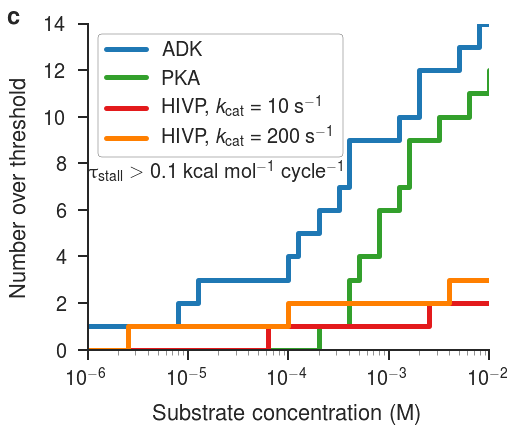

In [13]:
plot_load_over_threshold(concentrations, [adk_312_max_load,
                                          pka_140_max_load,
                                          hiv_10_max_load,
                                          hiv_200_max_load], 
                         colors=[cmap[1], cmap[3], cmap[5], cmap[7]],
                         names=[r'ADK', r'PKA',
                               r'HIVP, $k_\text{{cat}} = 10$ s$^{{-1}}$', r'HIVP, $k_\text{{cat}} = 200$ s$^{{-1}}$'],
                         annotation=r'$\tau_\text{{stall}} > 0.1$ kcal mol$^{{-1}}$ cycle$^{{-1}}$',
                         annotation_x=0.17, annotation_y=0.58,
                        ymax=14)
panel_label('c', panel_xoffset=-0.2, panel_yoffset=1.0)

# Find the number of torsion angle that produce power of at least 0.1 kcal per mol per second

In [14]:
concentrations, hiv_10_max_power = find_above_threshold(hiv_10, 'Max power', 0.1)
concentrations, hiv_200_max_power = find_above_threshold(hiv_200, 'Max power', 0.1)
concentrations, adk_312_max_power = find_above_threshold(adk_312, 'Max power', 0.1)
concentrations, pka_140_max_power = find_above_threshold(pka_140, 'Max power', 0.1)

100%|██████████| 60/60 [00:00<00:00, 148.78it/s]


/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:2641: UserWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'
  seen=seen, canon=canonical, used=seen[-1]))


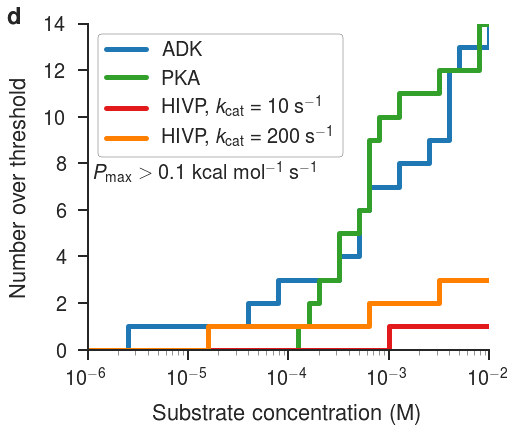

In [15]:
plot_load_over_threshold(concentrations, [adk_312_max_power,
                                          pka_140_max_power,
                                          hiv_10_max_power,
                                          hiv_200_max_power], 
                         colors=[cmap[1], cmap[3], cmap[5], cmap[7]],
                         names=[r'ADK', r'PKA',
                               r'HIVP, $k_\text{{cat}} = 10$ s$^{{-1}}$', r'HIVP, $k_\text{{cat}} = 200$ s$^{{-1}}$'],
                         annotation=r'$P_\text{{max}} > 0.1$ kcal mol$^{{-1}}$ s$^{{-1}}$',
                         annotation_x=0.18, annotation_y=0.58,
                        ymax=14)
panel_label('d', panel_xoffset=-0.2, panel_yoffset=1.0)